In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

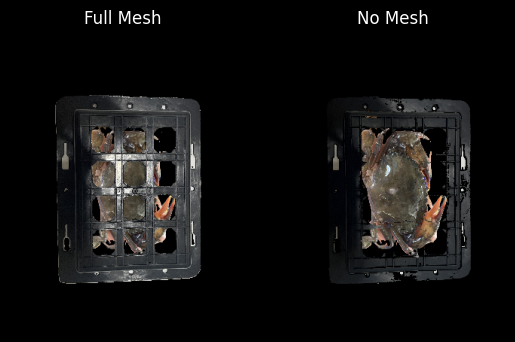

In [3]:
fullmesh = cv2.imread('./final_box/crab_fullmesh.png')
nomesh = cv2.imread('./final_box/crab_no_mesh.png')

# convert to RGB
fullmesh = cv2.cvtColor(fullmesh, cv2.COLOR_BGR2RGB)
nomesh = cv2.cvtColor(nomesh, cv2.COLOR_BGR2RGB)

# subplot
plt.subplot(1, 2, 1)
plt.imshow(fullmesh)
plt.title('Full Mesh')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nomesh)
plt.title('No Mesh')
plt.axis('off')

plt.show()

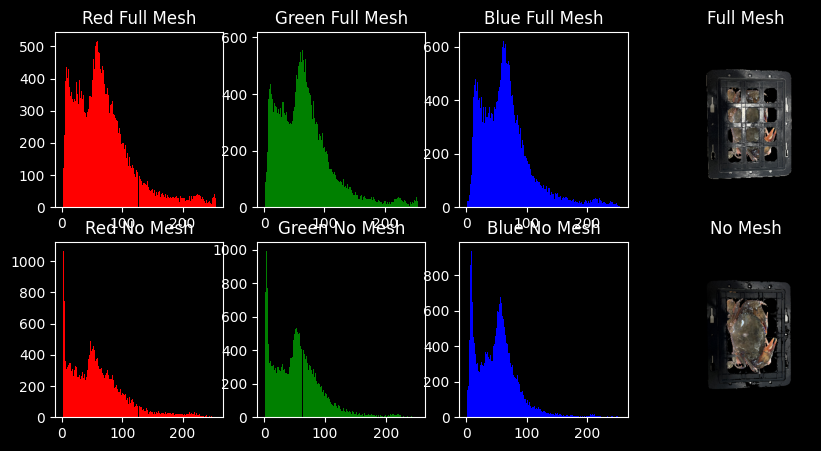

In [19]:
# dist plot 3 channels for 2 images
red_fullmesh = fullmesh[:, :, 0].flatten()
green_fullmesh = fullmesh[:, :, 1].flatten()
blue_fullmesh = fullmesh[:, :, 2].flatten()

red_nomesh = nomesh[:, :, 0].flatten()
green_nomesh = nomesh[:, :, 1].flatten()
blue_nomesh = nomesh[:, :, 2].flatten()

# remove 0 values
red_fullmesh = red_fullmesh[red_fullmesh != 0]
green_fullmesh = green_fullmesh[green_fullmesh != 0]
blue_fullmesh = blue_fullmesh[blue_fullmesh != 0]

red_nomesh = red_nomesh[red_nomesh != 0]
green_nomesh = green_nomesh[green_nomesh != 0]
blue_nomesh = blue_nomesh[blue_nomesh != 0]

plt.figure(figsize=(10, 5))

plt.subplot(2, 4, 1)
plt.hist(red_fullmesh, bins=256, color='red')
plt.title('Red Full Mesh')

plt.subplot(2, 4, 2)
plt.hist(green_fullmesh, bins=256, color='green')
plt.title('Green Full Mesh')

plt.subplot(2, 4, 3)
plt.hist(blue_fullmesh, bins=256, color='blue')
plt.title('Blue Full Mesh')

# plot image
plt.subplot(2, 4, 4)
plt.imshow(fullmesh)
plt.title('Full Mesh')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.hist(red_nomesh, bins=256, color='red')
plt.title('Red No Mesh')

plt.subplot(2, 4, 6)
plt.hist(green_nomesh, bins=256, color='green')
plt.title('Green No Mesh')

plt.subplot(2, 4, 7)
plt.hist(blue_nomesh, bins=256, color='blue')
plt.title('Blue No Mesh')

# plot image
plt.subplot(2, 4, 8)
plt.imshow(nomesh)
plt.title('No Mesh')
plt.axis('off')

plt.show()

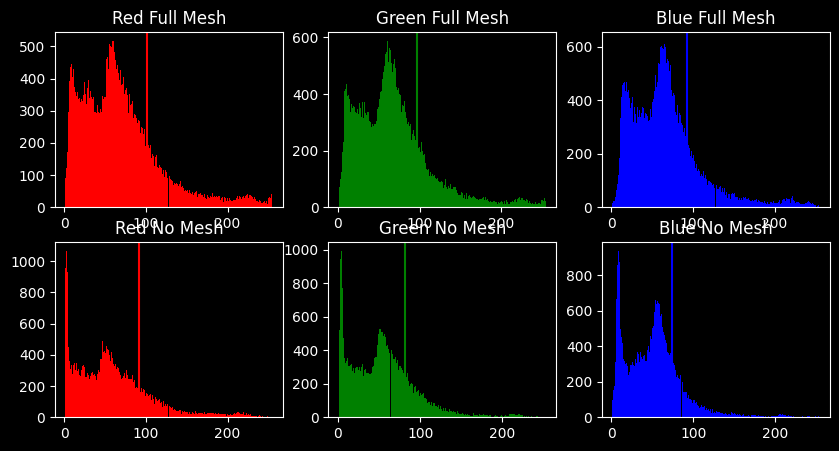

In [23]:
percentile = 80

# get percentiles 80th
red_fullmesh_80 = np.percentile(red_fullmesh, percentile)
green_fullmesh_80 = np.percentile(green_fullmesh, percentile)
blue_fullmesh_80 = np.percentile(blue_fullmesh, percentile)

red_nomesh_80 = np.percentile(red_nomesh, percentile)
green_nomesh_80 = np.percentile(green_nomesh, percentile)
blue_nomesh_80 = np.percentile(blue_nomesh, percentile)

# plot 80th percentile on same bins

plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.hist(red_fullmesh, bins=256, color='red')
plt.axvline(red_fullmesh_80, color='red')
plt.title('Red Full Mesh')

plt.subplot(2, 3, 2)
plt.hist(green_fullmesh, bins=256, color='green')
plt.axvline(green_fullmesh_80, color='green')
plt.title('Green Full Mesh')

plt.subplot(2, 3, 3)
plt.hist(blue_fullmesh, bins=256, color='blue')
plt.axvline(blue_fullmesh_80, color='blue')
plt.title('Blue Full Mesh')

plt.subplot(2, 3, 4)
plt.hist(red_nomesh, bins=256, color='red')
plt.axvline(red_nomesh_80, color='red')
plt.title('Red No Mesh')

plt.subplot(2, 3, 5)
plt.hist(green_nomesh, bins=256, color='green')
plt.axvline(green_nomesh_80, color='green')
plt.title('Green No Mesh')

plt.subplot(2, 3, 6)
plt.hist(blue_nomesh, bins=256, color='blue')
plt.axvline(blue_nomesh_80, color='blue')
plt.title('Blue No Mesh')

plt.show()

# New approach

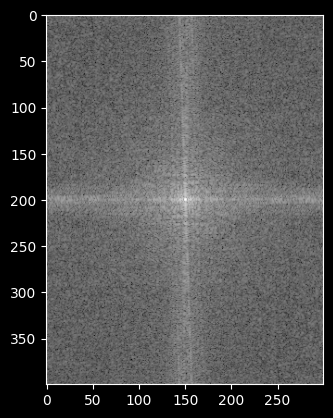

In [15]:


gray_full = cv2.cvtColor(fullmesh, cv2.COLOR_BGR2GRAY)
 
# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray_full), flags=cv2.DFT_COMPLEX_OUTPUT)
 
# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)
 
# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
 
# Scale the magnitude for display
magnitude_full = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
 
# Display the magnitude of the Fourier Transform
plt.imshow(magnitude_full, cmap='gray')

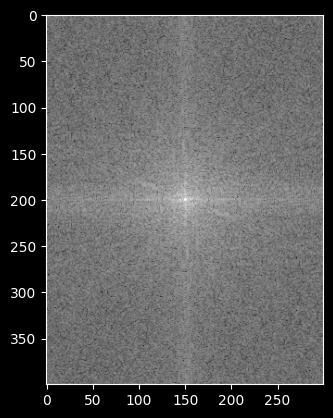

In [14]:


gray_no = cv2.cvtColor(nomesh, cv2.COLOR_BGR2GRAY)
 
# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray_no), flags=cv2.DFT_COMPLEX_OUTPUT)
 
# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)
 
# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
 
# Scale the magnitude for display
magnitude_no = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
 
# Display the magnitude of the Fourier Transform
plt.imshow(magnitude, cmap='gray')

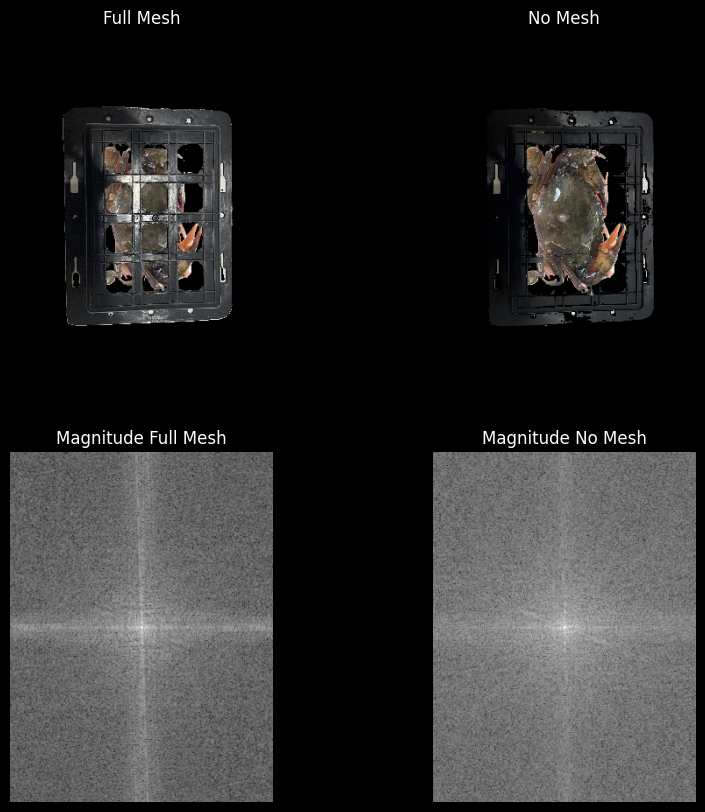

In [16]:
# subplot 4 images


plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(fullmesh)
plt.title('Full Mesh')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(nomesh)
plt.title('No Mesh')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(magnitude_full, cmap='gray')
plt.title('Magnitude Full Mesh')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(magnitude_no, cmap='gray')
plt.title('Magnitude No Mesh')
plt.axis('off')




plt.show()

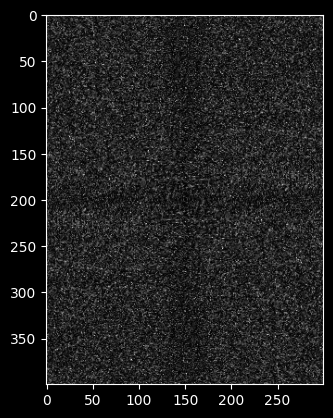

In [17]:
# get difference between 2 Magnitude images
difference = cv2.absdiff(magnitude_full, magnitude_no)

plt.imshow(difference, cmap='gray')

In [23]:
dft_ishift = np.fft.ifftshift(difference)
img_back = cv2.idft(dft_ishift, flags=cv2.DFT_COMPLEX_OUTPUT)
img_back = np.abs(img_back) 

plt.imshow(img_back, cmap='gray')

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\dxt.cpp:3506: error: (-215:Assertion failed) type == CV_32FC1 || type == CV_32FC2 || type == CV_64FC1 || type == CV_64FC2 in function 'cv::dft'
